In [486]:
import os
import numpy as np
import pandas as pd
from congress import Congress
import datetime as DT
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression #machine learning module - recomended
from sklearn import metrics
import statsmodels.api as sm
os.chdir('C:/Users/Asger/Dropbox/Økonomi/Topics in Social Data Science/Projekt/Asger')

### Loading data

In [383]:
drop_list = ['member1_id','member2_id','fullname_1','fullname_2','twitter_account_1','twitter_account_2','party_x','party_y']

df_dem = pd.read_csv('df_dem_final_woZero.csv',delimiter=',', index_col =0)
df_dem = df_dem.drop(drop_list, axis=1)

df_rep = pd.read_csv('df_rep_final_woZero.csv',delimiter=',', index_col =0)
df_rep = df_rep.drop(drop_list, axis=1)

df_all = pd.read_csv('df_all_final_woZero.csv',delimiter=',', index_col =0)
df_all = df_all.drop(drop_list, axis=1)

In [384]:
# Reading this data for statistics.
df_dem_raw = pd.read_csv('df_dem_final_raw.csv',delimiter=',', index_col =0)
df_dem_raw = df_dem_raw.drop(drop_list, axis=1)

df_rep_raw = pd.read_csv('df_rep_final_raw.csv',delimiter=',', index_col =0)
df_rep_raw = df_rep_raw.drop(drop_list, axis=1)

df_all_raw = pd.read_csv('df_all_final_raw.csv',delimiter=',', index_col =0)
df_all_raw = df_all_raw.drop(drop_list, axis=1)

## Statistic for the democrats

In [385]:
df_dem_raw.head()

,agree_percent,same_gender,same_age,same_state,neighborState,distance
0,95.79,1,0,0,0,50.126964
1,96.37,0,0,0,0,39.737375
2,93.67,1,0,0,0,43.074248
3,92.16,0,0,0,0,10.570002
4,95.56,1,0,0,0,39.873279


In [386]:
df_dem.describe()

# Without zeroes: 7,865
# With zeroes: 12,720

,agree_percent,same_gender,same_age,same_state,neighborState,distance,ademic,jaccard
count,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000,7865.000000
mean,92.691760,0.568722,0.430261,0.036999,0.091926,25.862982,4.294222,0.210596
std,3.616428,0.495286,0.495144,0.188772,0.288940,17.494997,3.279432,0.130556
min,75.090000,0.000000,0.000000,0.000000,0.000000,0.092775,0.000000,0.000000
25%,91.410000,0.000000,0.000000,0.000000,0.000000,11.325787,1.525853,0.093333
50%,93.620000,1.000000,0.000000,0.000000,0.000000,23.683439,3.780111,0.205128
75%,95.060000,1.000000,1.000000,0.000000,0.000000,41.212586,6.369449,0.299065
max,98.640000,1.000000,1.000000,1.000000,1.000000,89.649081,25.575065,0.782609


In [387]:
len(df_dem_raw)

17955

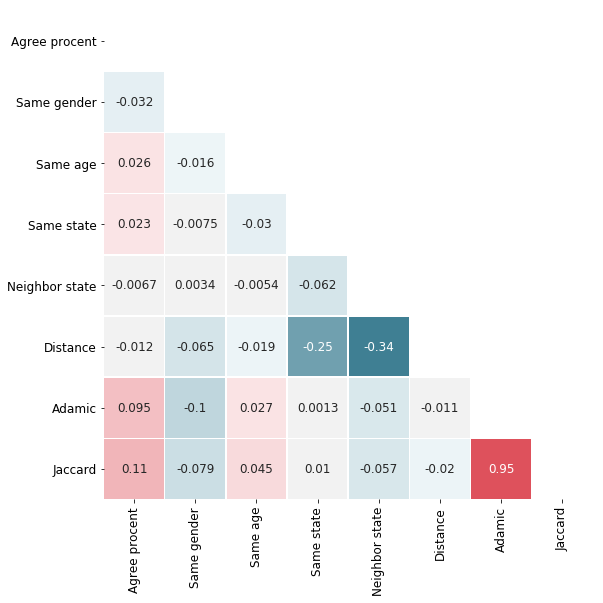

In [560]:
# Generate a mask for the upper triangle
corr = df_dem.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 12}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap_dem.pdf', bbox_inches="tight")

### Statistic for the republicans

In [389]:
df_rep_raw.describe()

# With zero: 13,777
#With out: 20.555
# Number of zeroes: 

,agree_percent,same_gender,same_age,same_state,neighborState,distance
count,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000,25256.000000
mean,92.907410,0.831882,0.498575,0.036902,0.106272,16.170486
std,4.704861,0.373979,0.500008,0.188525,0.308191,11.580626
min,17.650000,0.000000,0.000000,0.000000,0.000000,0.240274
25%,91.680000,1.000000,0.000000,0.000000,0.000000,7.933741
50%,93.790000,1.000000,0.000000,0.000000,0.000000,13.239355
75%,95.550000,1.000000,1.000000,0.000000,0.000000,21.449163
max,100.000000,1.000000,1.000000,1.000000,1.000000,85.170404


In [390]:
len(df_rep_raw)

25256

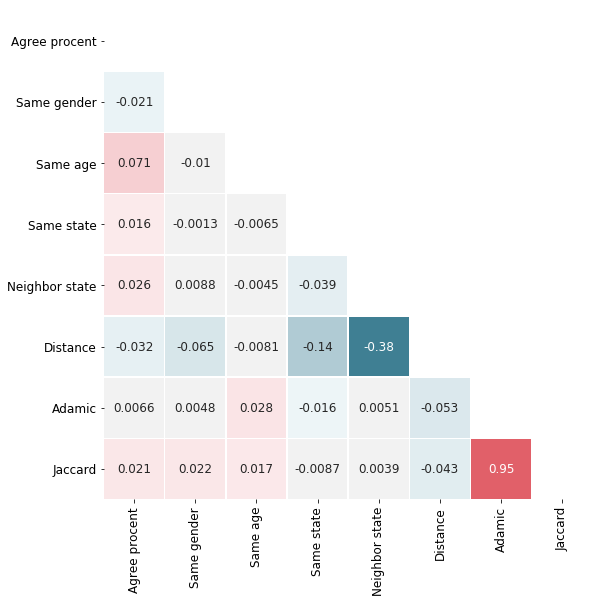

In [561]:
# Generate a mask for the upper triangle
corr = df_rep.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 12}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap_rep.pdf', bbox_inches="tight")

### Statistic for the ALL

In [563]:
df_all_raw.describe()

# With zero: 13,777
#With out: 20.555
# Number of zeroes: 

,agree_percent,same_gender,same_age,same_state,neighborState,distance
count,111639.000000,111639.000000,111639.000000,111639.000000,111639.000000,111639.000000
mean,61.115036,0.682271,0.466432,0.043883,0.086403,19.832399
std,32.550931,0.465596,0.498874,0.204835,0.280960,14.101352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.030100
25%,27.860000,0.000000,0.000000,0.000000,0.000000,9.082732
50%,62.000000,1.000000,0.000000,0.000000,0.000000,15.823905
75%,94.100000,1.000000,1.000000,0.000000,0.000000,29.215007
max,100.000000,1.000000,1.000000,1.000000,1.000000,92.022422


In [393]:
len(df_all_raw)

111639

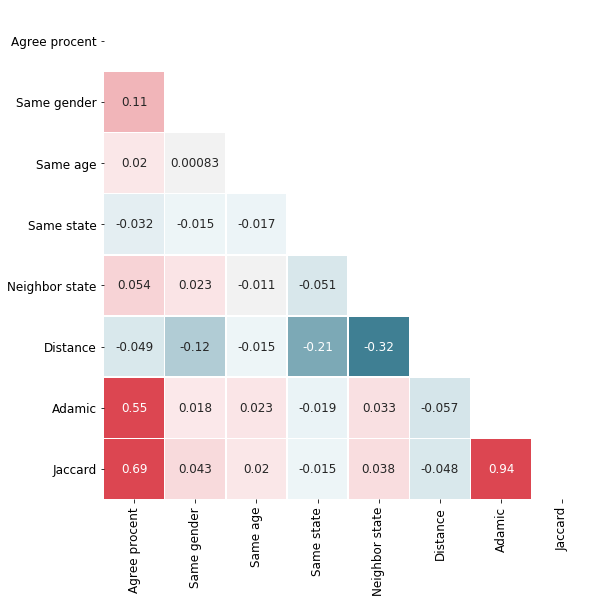

In [562]:
# Generate a mask for the upper triangle
corr = df_all.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

xticks = ['Agree procent','Same gender', 'Same age', 'Same state', 'Neighbor state', 'Distance','Adamic', 'Jaccard']
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True, annot_kws={"size": 12}, xticklabels=xticks,  yticklabels=xticks,
            square=True, linewidths=.5, cbar=None)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap_all.pdf', bbox_inches="tight")

# Prediction

In [395]:
df_train_rep = df_rep.copy()
df_train_dem = df_dem.copy()
df_train_all = df_all.copy()

df_train_rep.head()

,agree_percent,same_gender,same_age,same_state,neighborState,distance,ademic,jaccard
135,94.76,1,0,0,0,24.256553,6.723549,0.190184
144,92.42,1,0,0,0,44.719594,1.527412,0.046053
147,93.66,1,0,1,0,1.554337,0.189098,0.006579
153,89.14,1,1,0,0,43.222027,15.072495,0.425000
156,93.95,1,1,0,0,26.963132,1.024994,0.031847


In [277]:
# # Rescaling the data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_train_rep[['agree_percent']] =scaler.fit_transform(df_train_rep[['agree_percent']])
# df_train_dem[['agree_percent']] =scaler.fit_transform(df_train_dem[['agree_percent']])

In [441]:
X_vars = df_train_dem.columns[1:]

#Defining X and y for dem
X_dem = df_train_dem[X_vars]
y_dem = df_train_dem.agree_percent

#Defining X and y for rep
X_rep = df_train_rep[X_vars]
y_rep = df_train_rep.agree_percent

#Defining X and y for rep
X_all = df_train_all[X_vars]
y_all = df_train_all.agree_percent

## Freature importance with random forrest

In [451]:
clf_rf = RandomForestRegressor(max_depth=5, random_state=0)
clf_rf.fit(X_dem, y_dem)

importances = clf_rf.feature_importances_
names = X_dem.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_dem.shape[1]):  
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. distance (0.492917)
2. jaccard (0.277466)
3. ademic (0.164694)
4. same_age (0.031431)
5. neighborState (0.019179)
6. same_state (0.011925)
7. same_gender (0.002388)


In [453]:
clf_rf.fit(X_rep, y_rep)

importances = clf_rf.feature_importances_
names = X_dem.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_dem.shape[1]):  
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. jaccard (0.393683)
2. ademic (0.258071)
3. distance (0.250092)
4. same_age (0.076896)
5. same_gender (0.013279)
6. neighborState (0.007980)
7. same_state (0.000000)


In [455]:
clf_rf.fit(X_all, y_all)

importances = clf_rf.feature_importances_
names = X_dem.columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_dem.shape[1]):  
    print("%d. %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
1. jaccard (0.813139)
2. ademic (0.186521)
3. same_state (0.000337)
4. same_age (0.000003)
5. distance (0.000000)
6. neighborState (0.000000)
7. same_gender (0.000000)


## Estimation with OLS

In [456]:
df_rep_var = df_rep.drop(['ademic'], axis=1).copy()
df_dem_var = df_dem.drop(['ademic'], axis=1).copy()
df_all_var = df_all.drop(['ademic'], axis=1).copy()
# df_rep_var = df_rep.drop(['jaccard'], axis=1).copy()
# df_dem_var = df_dem.drop(['jaccard'], axis=1).copy()
# df_all_var = df_all.drop(['jaccard'], axis=1).copy()
df_rep_var['const']=1 
df_dem_var['const']=1 
df_all_var['const']=1 

X_vars = df_rep_var.columns[1:]

#Defining X and y for dem
X_dem = df_dem_var[X_vars]
y_dem = df_dem_var.agree_percent

#Defining X and y for rep
X_rep = df_rep_var[X_vars]
y_rep = df_rep_var.agree_percent

#Defining X and y for rep
X_all = df_all_var[X_vars]
y_all = df_all_var.agree_percent

In [457]:
# Results for democrats
results = sm.OLS(y_dem, X_dem).fit()
print(results.summary())

# Jaccard not significant :(

                            OLS Regression Results                            
Dep. Variable:          agree_percent   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     19.54
Date:                Fri, 25 May 2018   Prob (F-statistic):           9.33e-23
Time:                        13:33:15   Log-Likelihood:                -21212.
No. Observations:                7865   AIC:                         4.244e+04
Df Residuals:                    7858   BIC:                         4.249e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
same_gender      -0.1687      0.082     -2.051

In [458]:
# Results for democrats
results = sm.OLS(y_rep, X_rep).fit()
print(results.summary())

# Jaccard not significant :(

                            OLS Regression Results                            
Dep. Variable:          agree_percent   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     16.82
Date:                Fri, 25 May 2018   Prob (F-statistic):           1.93e-19
Time:                        13:33:20   Log-Likelihood:                -40185.
No. Observations:               13777   AIC:                         8.038e+04
Df Residuals:                   13770   BIC:                         8.044e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
same_gender      -0.2800      0.106     -2.637

In [459]:
# Results for ALL
results = sm.OLS(y_all, X_all).fit()
print(results.summary())

# Jaccard not significant :(

                            OLS Regression Results                            
Dep. Variable:          agree_percent   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.092e+04
Date:                Fri, 25 May 2018   Prob (F-statistic):               0.00
Time:                        13:33:26   Log-Likelihood:            -3.1978e+05
No. Observations:               70208   AIC:                         6.396e+05
Df Residuals:                   70201   BIC:                         6.396e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
same_gender       5.2278      0.187     27.909

# Prediction with binary variable

In [460]:
df_rep_bi = df_rep.copy()
df_dem_bi = df_dem.copy()
df_all_bi = df_all.copy()

df_dem_bi['agree_percent'] = np.where(df_dem_bi.agree_percent>93.82,1,0) # Over median
df_rep_bi['agree_percent'] = np.where(df_rep_bi.agree_percent>93.87,1,0) # Over median
df_all_bi['agree_percent'] = np.where(df_all_bi.agree_percent>54.8,1,0) # Over median

df_dem_bi = df_dem_bi.drop(['ademic'], axis=1)
df_rep_bi = df_rep_bi.drop(['ademic'], axis=1)
df_all_bi = df_all_bi.drop(['ademic'], axis=1)

# df_dem_bi = df_dem_bi.drop(['jaccard'], axis=1)
# df_rep_bi = df_rep_bi.drop(['jaccard'], axis=1)
# df_all_bi = df_all_bi.drop(['jaccard'], axis=1)

df_dem_bi.head()

,agree_percent,same_gender,same_age,same_state,neighborState,distance,jaccard
0,1,1,0,0,0,50.126964,0.329545
13,1,0,1,0,0,21.329847,0.358696
23,1,0,0,0,0,49.268000,0.260274
26,0,0,0,0,0,45.702193,0.220930
29,1,1,0,0,0,50.007473,0.065574


In [461]:
msk_dem = np.random.rand(len(df_dem_bi)) < 0.8
train_dem = df_dem_bi[msk_dem]
test_dem = df_dem_bi[~msk_dem]
print(len(train_dem), len(test_dem))

msk_rep = np.random.rand(len(df_rep_bi)) < 0.8
train_rep = df_rep_bi[msk_rep]
test_rep = df_rep_bi[~msk_rep]
print(len(train_rep), len(test_rep))

msk_all = np.random.rand(len(df_all_bi)) < 0.8
train_all = df_all_bi[msk_all]
test_all = df_all_bi[~msk_all]
print(len(train_all), len(test_all))

6313 1552
11026 2751
56166 14042


In [462]:
X_vars = train_dem.columns[1:7]

#Democrats
X_train_dem = train_dem[X_vars]
y_train_dem = train_dem.agree_percent

X_test_dem = test_dem[X_vars]
y_test_dem = test_dem.agree_percent

#Republicans
X_train_rep = train_rep[X_vars]
y_train_rep = train_rep.agree_percent

X_test_rep = test_rep[X_vars]
y_test_rep = test_rep.agree_percent

#all
X_train_all = train_all[X_vars]
y_train_all = train_all.agree_percent

X_test_all = test_all[X_vars]
y_test_all = test_all.agree_percent

### Democrats

In [551]:
# Logistic regression on democrats
clf_lg = LogisticRegression().fit(X_train_dem, y_train_dem)
pred_log = clf_lg.predict(X_test_dem)
pred_proba_log = clf_lg.predict_proba(X_test_dem)[:,1]

matrix = metrics.confusion_matrix(y_test_dem,pred_log)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_dem,pred_dem))

confusion matrix: 
           0         1
0  0.770142  0.274011
1  0.592417  0.293785
Accuracy: 0.5740979381443299


In [552]:
# random forrest on democratss
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train_dem, y_train_dem)
pred_rf = clf_rf.predict(X_test_dem)
pred_proba_rf = clf_rf.predict_proba(X_test_dem)[:,1]

matrix = metrics.confusion_matrix(y_test_dem,pred_rf)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy :",metrics.accuracy_score(y_test_dem,pred_dem))

confusion matrix: 
           0         1
0  0.715640  0.338983
1  0.498815  0.405367
Accuracy : 0.5740979381443299


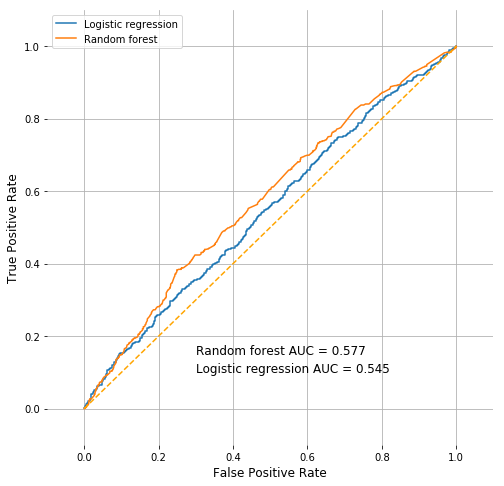

In [553]:
#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_dem, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_test_dem, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_dem, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_test_dem, pred_proba_rf), 3)

plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "Logistic regression")
plt.plot(fpr2, tpr2, label = "Random forest")


plt.text(0.3,0.1,"Logistic regression AUC = " + str(auc1), fontsize = 12)
plt.text(0.3,0.15,"Random forest AUC = " + str(auc2), fontsize = 12)

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid(True)

plt.legend()
sns.despine(left=True, bottom= True)

plt.savefig('roc_dem.pdf', bbox_inches="tight")

plt.show()



### Republicans

In [554]:
# Logistic regression on republicans
clf_lg = LogisticRegression().fit(X_train_rep, y_train_rep)
pred_log = clf_lg.predict(X_test_rep)
pred_proba_log = clf_lg.predict_proba(X_test_rep)[:,1]

matrix = metrics.confusion_matrix(y_test_rep,pred_rep)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix: ",'\n', pd.DataFrame(matrix))
print("Accuracy nltk:",metrics.accuracy_score(y_test_rep,pred_rep))

confusion matrix:  
           0         1
0  0.811245  0.224344
1  0.616466  0.267303
Accuracy nltk: 0.5627044711014176


In [555]:
# random forrest on repocratss
clf_rf = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train_rep, y_train_rep)
pred_rf = clf_rf.predict(X_test_rep)
pred_proba_rf = clf_rf.predict_proba(X_test_rep)[:,1]

matrix = metrics.confusion_matrix(y_test_rep,pred_rep)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_rep,pred_rep))

confusion matrix: 
           0         1
0  0.811245  0.224344
1  0.616466  0.267303
Accuracy: 0.5627044711014176


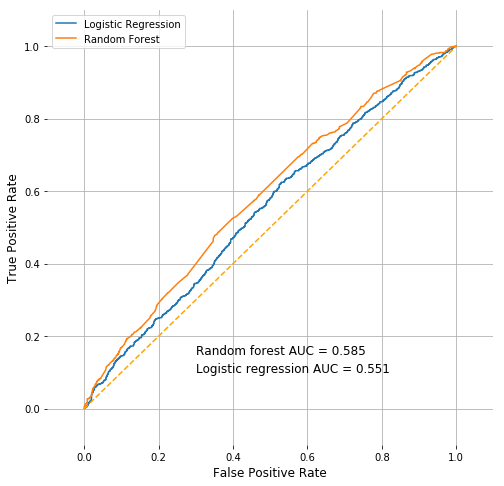

In [556]:
#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_rep, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_test_rep, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_rep, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_test_rep, pred_proba_rf), 3)

plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "Logistic Regression")
plt.plot(fpr2, tpr2, label = "Random Forest")


plt.text(0.3,0.1,"Logistic regression AUC = " + str(auc1), fontsize = 12)
plt.text(0.3,0.15,"Random forest AUC = " + str(auc2), fontsize = 12)

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid(True)

plt.legend()
sns.despine(left=True, bottom= True)


plt.savefig('roc_rep.pdf', bbox_inches="tight")

plt.show()

### ALL

In [557]:
# Logistic regression on all
clf_lg = LogisticRegression().fit(X_train_all, y_train_all)
pred_log = clf_lg.predict(X_test_all)
pred_proba_log = clf_lg.predict_proba(X_test_all)[:,1]

matrix = metrics.confusion_matrix(y_test_all,pred_all)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_all,pred_all))

confusion matrix: 
           0         1
0  0.926518  0.108853
1  0.099487  0.852624
Accuracy: 0.896738356359493


In [558]:
# random forrest on allocratss
clf_rf = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train_all, y_train_all)
pred_rf = clf_rf.predict(X_test_all)
pred_proba_rf = clf_rf.predict_proba(X_test_all)[:,1]

matrix = metrics.confusion_matrix(y_test_all,pred_all)
matrix = matrix/matrix.sum(axis=1) # divide by row counts

print("confusion matrix:",'\n', pd.DataFrame(matrix))
print("Accuracy:",metrics.accuracy_score(y_test_all,pred_all))

confusion matrix: 
           0         1
0  0.926518  0.108853
1  0.099487  0.852624
Accuracy: 0.896738356359493


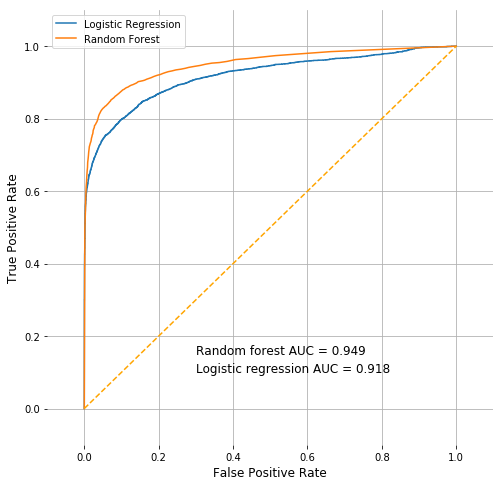

In [559]:
#Logistic regression
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_all, pred_proba_log)
auc1 = round(metrics.roc_auc_score(y_test_all, pred_proba_log), 3)

#Random forrest
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_all, pred_proba_rf)
auc2 = round(metrics.roc_auc_score(y_test_all, pred_proba_rf), 3)

plt.figure(figsize=[8,8])

plt.plot(fpr1, tpr1, label = "Logistic Regression")
plt.plot(fpr2, tpr2, label = "Random Forest")


plt.text(0.3,0.1,"Logistic regression AUC = " + str(auc1), fontsize = 12)
plt.text(0.3,0.15,"Random forest AUC = " + str(auc2), fontsize = 12)

plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), linestyle = "dashed", color = "orange")

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
#plt.title('ROC curve', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid(True)

plt.legend()
sns.despine(left=True, bottom= True)

plt.savefig('roc_all.pdf', bbox_inches="tight")

plt.show()